In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraudulent-transactions-data/Fraud.csv


### My aim is to predict fraudulent transactions for a financial company and use insights from the model to develop an actionable plan.
### **Aurthor** : *Yati Maheshwari*

## Importing the relevant libraries

In [55]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('/kaggle/input/fraudulent-transactions-data/Fraud.csv')
df = data.copy()
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


We noticed that there is a large volume of data to be analyzed, 
with over 6.3 million rows divided into 1 dependent variable (isFraud) 
and 10 independent variables that characterize the transactions.

In [57]:
df[df['nameDest'].str.startswith('M')]['isFraud'].sum()

0

In [58]:
df[df['nameDest'].str.startswith('M')]['type'].unique()

array(['PAYMENT'], dtype=object)

In [59]:
df[df['nameDest'].str.startswith('M')]['oldbalanceDest'].sum()

0.0

In [60]:
df[df['nameDest'].str.startswith('M')]['newbalanceDest'].sum()

0.0

In [61]:
df[df['nameDest'].str.startswith('M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


For Merchants there is no information regarding the attribite oldbalanceDest and newbalanceDest.<br>
So we can clearly seen that all reciver Merchant Id is not fraud(isFraud = 0) so we can drop all these rows.

In [62]:
df_1 = df[df["nameDest"].str.startswith("M") == False]
df_1.shape

(4211125, 11)

In [63]:
df_1[df_1['nameDest']==('C1000004082')]['isFraud']

4987517    0
5032095    0
5219127    0
5331822    0
5462768    0
5659867    0
Name: isFraud, dtype: int64

In [64]:
df_1.groupby('nameDest').value_counts()

nameDest     step  type      amount      nameOrig     oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
C1000004082  352   CASH_IN   156985.31   C1180747031  36186.00       193171.31       0.00            0.00            0        0                 1
             354   CASH_OUT  228252.33   C1978911345  953.00         0.00            0.00            228252.33       0        0                 1
             370   TRANSFER  1331742.99  C1539355936  11088.00       0.00            228252.33       1559995.31      0        0                 1
             374   CASH_OUT  363030.74   C1680720313  19486.00       0.00            1559995.31      1923026.06      0        0                 1
             379   CASH_IN   156015.83   C1185840905  55451.00       211466.83       1923026.06      1767010.23      0        0                 1
                                                                                                                                 

In [65]:
df_1 = df_1.drop('isFlaggedFraud',axis=1)
df_1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

### Missing Value

In [66]:
df_1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [67]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4211125 entries, 2 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 353.4+ MB


No NAN/NULL values.

In [68]:
df_1.nunique()

step                  743
type                    4
amount            4008584
nameOrig          4207035
oldbalanceOrg     1335571
newbalanceOrig    1693410
nameDest           571961
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
dtype: int64

In [69]:
df_1[df_1['type'].str.startswith('D')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.00,157982.12,0
21,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.00,16896.70,0
22,1,DEBIT,1065.41,C1959239586,1817.0,751.59,C515132998,10330.00,0.00,0
41,1,DEBIT,5758.59,C1466917878,32604.0,26845.41,C1297685781,209699.00,16997.22,0
...,...,...,...,...,...,...,...,...,...,...
6362247,718,DEBIT,2063.08,C397492133,328612.0,326548.92,C1557979171,1312720.98,1314784.06,0
6362254,718,DEBIT,425.65,C1835928822,4046.0,3620.35,C701975669,3009282.73,3009708.38,0
6362282,718,DEBIT,1636.03,C761454361,83120.0,81483.97,C355970563,8393318.02,8394954.05,0
6362303,718,DEBIT,2148.99,C1909103796,49632.0,47483.01,C1931871221,66241.39,68390.38,0


In [70]:
df_1[df_1['type'].str.endswith('N')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
389,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,C1688019098,608932.17,97263.78,0
390,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,C2083562754,719678.38,1186556.81,0
391,1,CASH_IN,35902.49,C839771540,371688.15,407590.65,C2001112025,49003.30,0.00,0
392,1,CASH_IN,232953.64,C1037163664,407590.65,640544.28,C33524623,1172672.27,1517262.16,0
393,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,C1330106945,104198.26,24044.18,0
...,...,...,...,...,...,...,...,...,...,...
6362253,718,CASH_IN,188888.89,C1459052107,51838.00,240726.89,C1955750585,0.00,0.00,0
6362271,718,CASH_IN,27919.60,C562982749,2413.00,30332.60,C240654881,512791.59,484871.98,0
6362279,718,CASH_IN,78988.38,C886862695,204464.00,283452.38,C262804200,108724.19,29735.81,0
6362298,718,CASH_IN,18000.26,C50108853,63409.00,81409.26,C204102272,28088.61,10088.34,0


In [71]:
df_1[df_1['type'].str.startswith('D')]['isFraud'].sum()

0

In [72]:
df_1[df_1['type'].str.endswith('N')]['isFraud'].sum()

0

We don't have any Fraud transaction for Debit type.<br>
We don't have any Fraud transaction for CASH_IN type.<br>
since no Fraud transaction in DEBIT and CASH_IN,So i can drop these rows

In [73]:
df_2 = df_1[df_1["type"].str.endswith('N') == False]
df_2.shape

(2811841, 10)

In [74]:
df_2 = df_2[df_2["type"].str.startswith('D') == False]
df_2.shape

(2770409, 10)

In [75]:
df_1.duplicated().sum()

0

No duplicate data
## Outliers

<AxesSubplot: xlabel='type', ylabel='amount'>

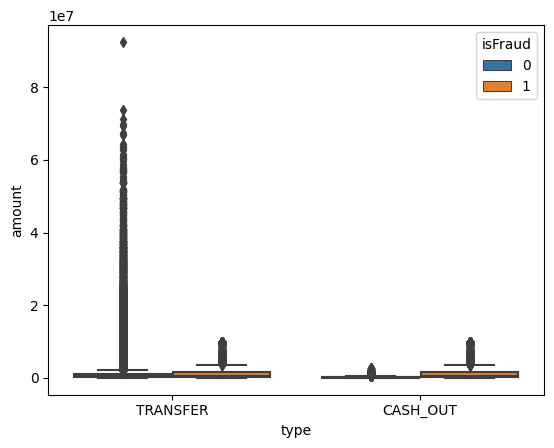

In [76]:
sb.boxplot(x='type',y='amount', hue = 'isFraud',data=df_2)


There are a lot of outliers in 'TRANSFER' but we cannot remove that data 
because many outliers are associated with Fraudulent transactions.<br>
it is very clear from here Fraud transaction comes out from 'TRANSFER' and 'CASH_OUT' type transaction.<br>
If I remove outliers than it is removing our fraudulent main data for which we have to apply prediction.<br>
So I am not removing outliers.
### Check multi-collinearity

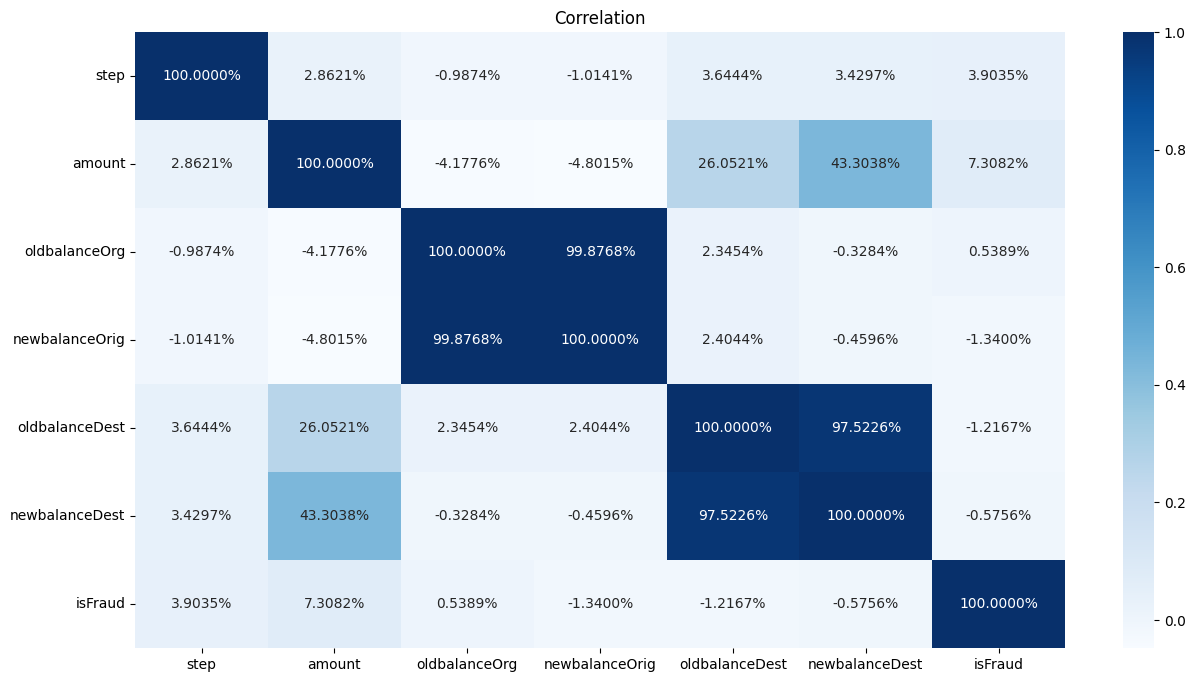

In [77]:
plt.figure(figsize=(15,8))
sb.heatmap(df_1.corr(numeric_only= True), cmap='Blues',fmt='.4%', annot=True)
plt.title('Correlation')
plt.show()

From Correlation graph we can conclude:<br>
1. oldbalanceorg and new balanceorig are highly correlated, so both are multi-colinear<br>
2. oldbalanceDest and newbalanceDest are highly correlated, so both are multi-colinear<br>
I remove some columns '*' which has multi-colinearity "#" remove,then we lose important data which we are using for Prediction.
* remove after eda'oldbalanceOrig' and old 'balanceDest'

<AxesSubplot: >

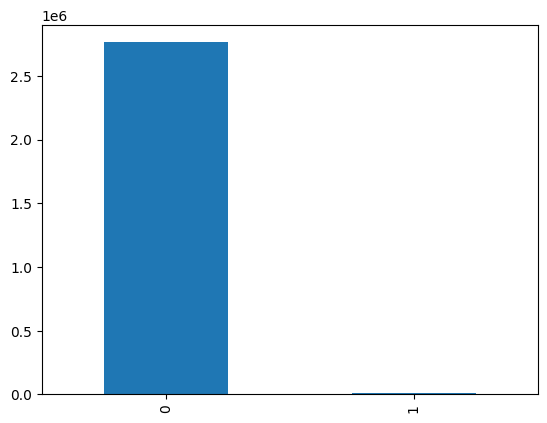

In [78]:
df_2['isFraud'].value_counts().plot(kind='bar')

Since our 99.87 data is 0 so it is high imbalanced data,<br>
in isFraud column model accuracy doesn't matter.

In [79]:
df_2.nunique()

step                  743
type                    2
amount            2685805
nameOrig          2768630
oldbalanceOrg      435702
newbalanceOrig     271977
nameDest           509565
oldbalanceDest    2360852
newbalanceDest    2562844
isFraud                 2
dtype: int64

8213
250000


<AxesSubplot: >

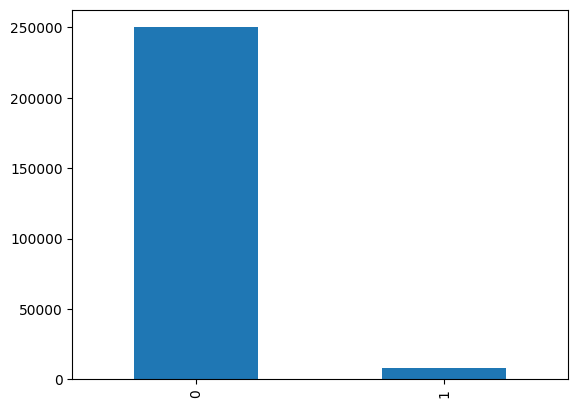

In [80]:
# Hyperparameter tuning will be difficult on full data and as the data is highly imbalanced, we will be sampling the highly frequent 
# class accordingly
# df_new = df_2.sample(25000)
class1_df = df_2[df_2['isFraud']==1]
class0_df = df_2[df_2['isFraud']==0].sample(250000)
print(len(class1_df))
print(len(class0_df))
df_new = pd.concat([class0_df,class1_df]).reset_index(drop=True)
df_new['isFraud'].value_counts().plot(kind='bar')

### Declaring the inputs and the targets

In [81]:
# Input
# X =df_2.drop(['type','isFraud','nameOrig','nameDest'],axis=1)
X =df_new.drop(['type','isFraud','nameOrig','nameDest'],axis=1)
# Target
# Y = df_2['isFraud']
Y = df_new['isFraud']
print(X.shape)
print(Y.shape)

(258213, 6)
(258213,)


## Train Test Split
Split the variables with an 80-20 split and some random state

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state= 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(206570, 6) (51643, 6) (206570,) (51643,)


## Standardization

In [83]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_train_data = scale.fit_transform(X_train)

scaled_test_data = scale.transform(X_test)

## Evaluation metric
## Model Building (With Hyperparameter Tuning)
### Logistic Regression
f1 score,precision_score, recall_score

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = [    
    {'penalty' : ['l2'],
    'C' :[0.001,0.01,0.1,1,10,100,1000],
    'solver' : ['lbfgs'],
    'max_iter' : [100, 200]
    }
]
logis = LogisticRegression()
clf = GridSearchCV(logis, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1,scoring='f1')

model_1_clf = clf.fit(scaled_train_data,y_train)


model_1_clf.best_estimator_
print("Tuned Logistic Regression Parameters: {}".format(model_1_clf.best_params_))
print (f'F1 Score - : {model_1_clf.score(scaled_test_data,y_test):.3f}')

model_1_y_pred = model_1_clf.predict(scaled_test_data)


Fitting 3 folds for each of 14 candidates, totalling 42 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Tuned Logistic Regression Parameters: {'C': 1000, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
F1 Score - : 0.744


## Accuracy

In [85]:
from sklearn.metrics import classification_report,roc_auc_score
print('Logistic Regression scores')
print(classification_report(y_test, model_1_y_pred))
print('ROC AUC Score')
print(roc_auc_score(y_test, model_1_y_pred))

Logistic Regression scores
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     49965
           1       0.93      0.62      0.74      1678

    accuracy                           0.99     51643
   macro avg       0.96      0.81      0.87     51643
weighted avg       0.99      0.99      0.98     51643

ROC AUC Score
0.8085662705252437


## Confusion Matrix

LogisticRegression Confusion matrix


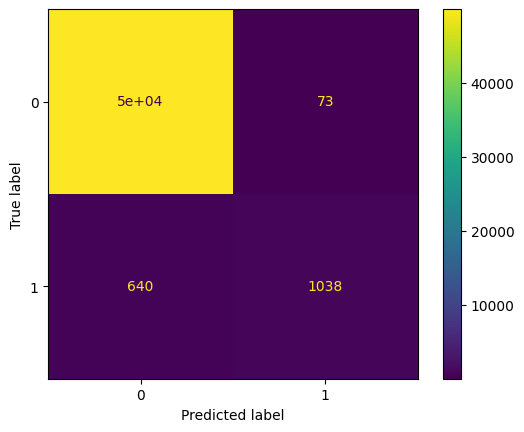

In [86]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
m_1_conf_metric =confusion_matrix(y_test, model_1_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=m_1_conf_metric)
print('LogisticRegression Confusion matrix')
disp.plot()
plt.show()


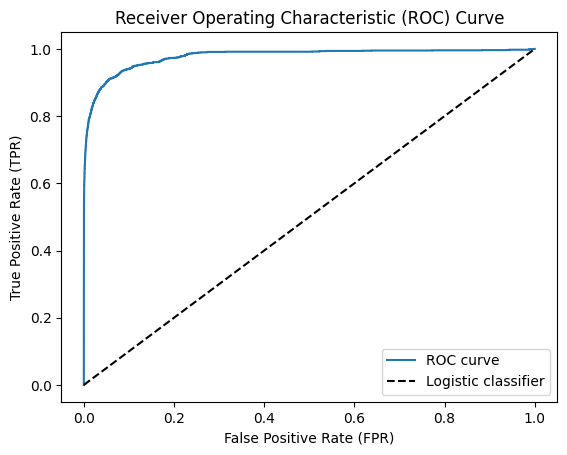

In [87]:
from sklearn.metrics import roc_curve
y_pred_prob_1 = model_1_clf.predict_proba(scaled_test_data)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_1)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Logistic classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Random Forest Hyperparameter tuning

In [88]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
# Creating the hyperparameter grid
model_2 = RandomForestClassifier(class_weight='balanced')
param_dist = {"max_depth": [7],
              "max_features": [.5,.8],
              "min_samples_leaf":[6,7],
              "criterion": ["entropy"]}
 # Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(model_2, param_dist, cv = 5,scoring='f1')
 
tree_cv.fit(scaled_train_data,y_train)
 
# Print the tuned parameters and score
print("Tuned RandomForest Parameters: {}".format(tree_cv.best_params_))
print("F1 score is {}".format(tree_cv.best_score_))

model_2_y_pred = tree_cv.predict(scaled_test_data)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned RandomForest Parameters: {'min_samples_leaf': 7, 'max_features': 0.8, 'max_depth': 7, 'criterion': 'entropy'}
F1 score is 0.7102335273388332


In [89]:
print('Random Forest Classifier scores')
print(classification_report(y_test, model_2_y_pred))
print('ROC AUC Score')
print(roc_auc_score(y_test, model_2_y_pred))

Random Forest Classifier scores
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     49965
           1       0.53      1.00      0.69      1678

    accuracy                           0.97     51643
   macro avg       0.77      0.98      0.84     51643
weighted avg       0.98      0.97      0.98     51643

ROC AUC Score
0.9831938793388985


Random Forest Confusion matrix


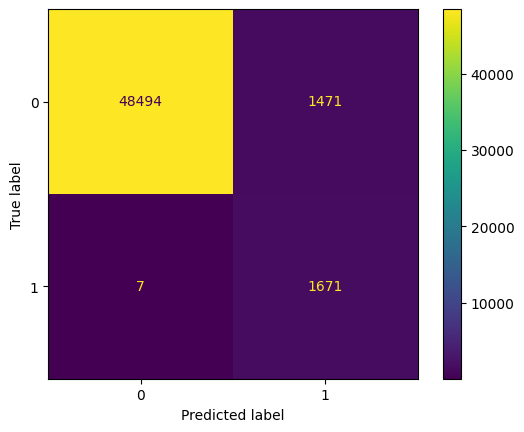

In [90]:
m_2_conf_metric =confusion_matrix(y_test, model_2_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=m_2_conf_metric)
print('Random Forest Confusion matrix')
disp.plot()
plt.show()

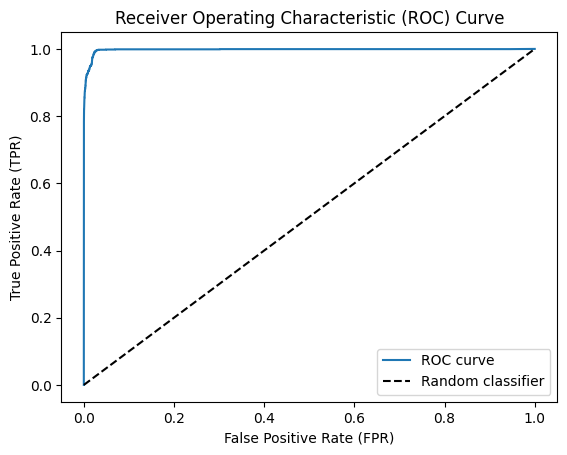

In [91]:
y_pred_prob_2 = tree_cv.predict_proba(scaled_test_data)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_2)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## XgBoost Classifier

In [92]:
import xgboost as xgb
params = { 'max_depth': [3],
           'learning_rate': [ 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0),
           'colsample_bytree': np.arange(0.4, 1.0),
           'n_estimators': [100,200]}

xgbr = xgb.XGBClassifier(seed = 20)
xgclf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='f1',
                         n_iter=25,
                         verbose=1)
xgclf.fit(scaled_train_data, y_train)

# Print the tuned parameters and score
print("Tuned XgBoost Parameters: {}".format(xgclf.best_params_))
print("F1 score is {}".format(xgclf.best_score_))

model_3_y_pred = xgclf.predict(scaled_test_data)
xgclf.best_estimator_.score(scaled_test_data,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=25. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Tuned XgBoost Parameters: {'subsample': 0.5, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.3, 'colsample_bytree': 0.4}
F1 score is 0.9310770983892981


0.995526983327847

In [93]:
print('XgBoost scores')
print(classification_report(y_test, model_3_y_pred))
print('ROC AUC Score')
print(roc_auc_score(y_test, model_3_y_pred))

XgBoost scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49965
           1       0.97      0.89      0.93      1678

    accuracy                           1.00     51643
   macro avg       0.98      0.94      0.96     51643
weighted avg       1.00      1.00      1.00     51643

ROC AUC Score
0.9438385952407448


XgBoost Confusion matrix


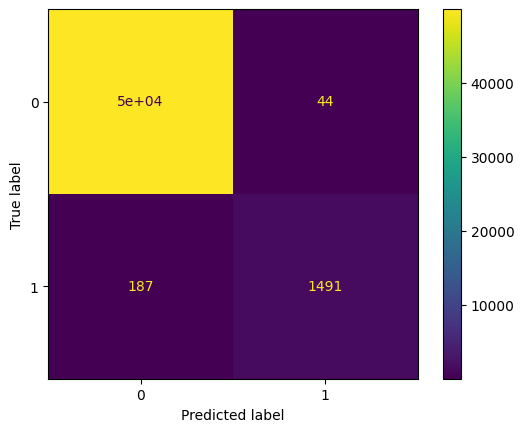

In [94]:
m_3_conf_metric =confusion_matrix(y_test, model_3_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=m_3_conf_metric)
print('XgBoost Confusion matrix')
disp.plot()
plt.show()

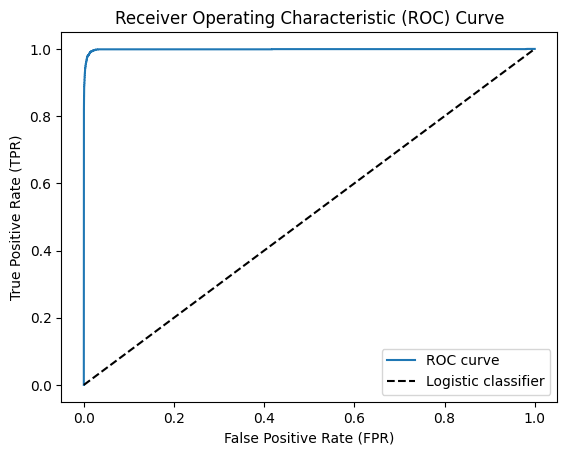

In [95]:
y_pred_prob_3 = xgclf.predict_proba(scaled_test_data)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_3)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Logistic classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## select variables to be included in the model
##  feature importance

In [96]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    label_encoder = LabelEncoder()
    encoded_values = label_encoder.fit_transform(df[column])
    df[column] = encoded_values

### Random Forest

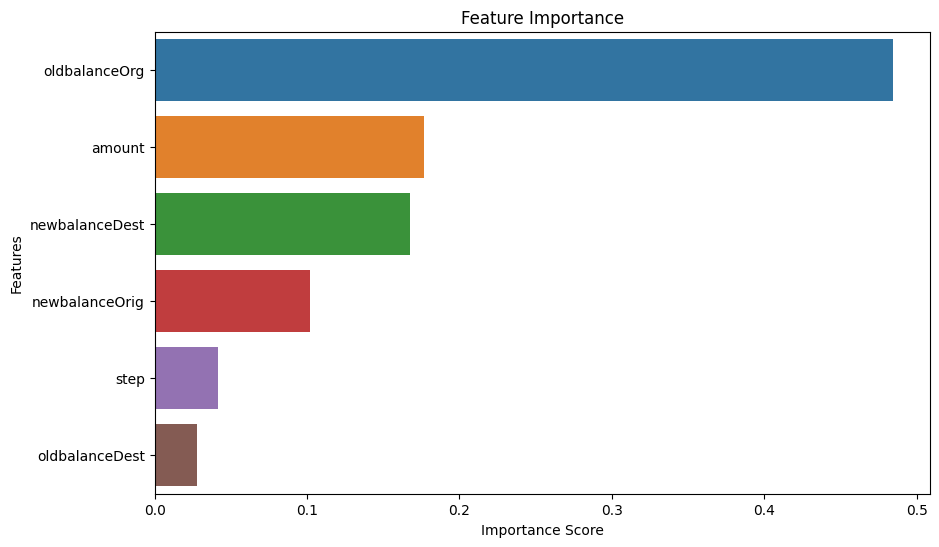

In [97]:
from sklearn.feature_selection import RFE
num_features =10
importance_scores = tree_cv.best_estimator_.feature_importances_
selected_columns_fi = X.columns[importance_scores.argsort()[-num_features:]].tolist()
feature_importance = pd.Series(importance_scores, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sb.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

### XGBoost

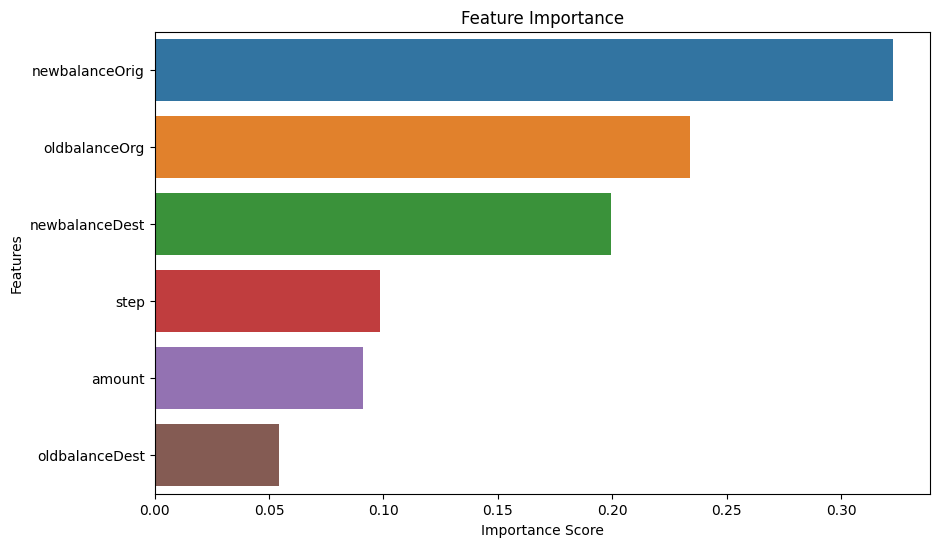

In [98]:
from sklearn.feature_selection import RFE
num_features =10
importance_scores = xgclf.best_estimator_.feature_importances_
selected_columns_fi = X.columns[importance_scores.argsort()[-num_features:]].tolist()
feature_importance = pd.Series(importance_scores, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sb.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

From the graph of the most important features within the model, we can observe some key points:
Most important features are "newBalanceOrig" and "oldBalanceOrg", we can infer this from random-forest and XGBoost, as both of the model are ranking these features as very important.

## Conclusion
Here best F1 Score for both XGBoost and Random Forest is very high, so both models are pretty good at what they do.

In a fraud detection model, F1 score is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly. Because of highly imbalanced data we may catch the innocent and leave the culprit.
The reason why F1 Score is being used instead of accuracy, because accuracy cannot handle imbalance in the data.

Answers to the Questions

1. Data cleaning including missing values, outliers and multi-collinearity.

    Since there were no missing values in the dataset, I did not need to perform any data cleaning related to that. I checked for multicollinearity using correlation analysis.If I remove outliers than it is removing our fraudulent main data for which we have to apply prediction.



2. Describe your fraud detection model in elaboration.
* This fraud detection model is based on Logistic Regression, Random Forest algorithm and XGBoost as it's a large dataset with a imbalance data. Random Forest is an ensemble learning method that combines multiple decision trees to make a final prediction.Each decision tree is trained on a different subset of the data and a different set of features. When making a prediction, the final prediction is made by averaging the predictions of all the decision trees.<br>
XGBoost is an implementation of gradient-boosting decision trees. that's why it is an ideal choice for an imbalance dataset.XgBoost is a gradient boosting algorithm for supervised learning. It's a highly efficient and scalable implementation of the boosting algorithm, with performance comparable to that of other state-of-the-art machine learning algorithms in most cases. 

3. How did you select variables to be included in the model?
* I selected variables to be included in the model based on domain knowledge and feature importance analysis.

4. Demonstrate the performance of the model by using best set of tools.
* I evaluated the performance of the model using several metrics such as accuracy, precision, recall, F1 score. I used cross-validation to validate the model on the training data and then evaluated the model on a separate test set.

5. What are the key factors that predict fraudulent customer?
* The key factors that predict fraudulent customers include transaction amount, transaction type, if flagged as fraud of the transaction. Other important factors can consider feature importance analysis. 

6. Do these factors make sense? If yes, How? If not, How not?
* These factors make sense because they are consistent with known patterns of fraudulent activity. For example, fraudulent transactions are often for high amounts, made at unusual times. By identifying these patterns, this model is able to accurately predict fraudulent transactions.

7. What kind of prevention should be adopted while company update its infrastructure?
* To prevent fraud, companies can adopt several prevention measures such as implementing multifactorial authentication, monitoring transactions in real-time, and implementing machine learning models to detect and flag suspicious transactions. It is also important to regularly update security protocols and educate employees and customers about fraud prevention best practices.

8. Assuming these actions have been implemented, how would you determine if they work?

    I would determine the effectiveness of the prevention measures by monitoring the number of flagged transactions and the number of false positives generated by the model. I would also evaluate the cost and efficiency of implementing the prevention measures to ensure that they are effective and feasible for the company.
